<a href="https://colab.research.google.com/github/JSY0717/Deep-Learning-with-Python/blob/main/understanding_and_advanced_usage_of_recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent neural networks (순환신경망)

# 1) Simple RNN의 기본 구조

In [ ]:
import numpy as np

timesteps = 3
input_features = 1
output_features = 1
i = 0
j = 0

# 3x1 크기의 난수 생성
inputs = np.random.random((timesteps, input_features))
print(inputs)
inputs.shape

[[0.23598762]
 [0.19008022]
 [0.02493997]]


(3, 1)

In [ ]:
state_t = np.zeros((output_features))
print(state_t)
state_t.shape

[0.]


(1,)

In [ ]:
# RNN의 가중치값 설정
W = np.random.random((output_features,input_features))
U = np.random.random((output_features,output_features))

# 바이어스 값 생성
b = np.random.random((output_features))

print(W)
print(U)
print(b)

[[0.12388372]]
[[0.8357658]]
[0.93110354]


In [ ]:

successive_outputs = []
for input_t in inputs:
  print('input_t : ',input_t)
  output_t = np.tanh(np.dot(W,input_t) + np.dot(U,state_t) + b)
  print('output_t : ')
  print(output_t)
  print('----------')
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)
print(final_output_sequence)

input_t :  [0.23598762]
output_t : 
[0.94049041]
----------
input_t :  [0.19008022]
output_t : 
[0.94030558]
----------
input_t :  [0.02493997]
output_t : 
[0.93787127]
----------
[[0.94049041]
 [0.94030558]
 [0.93787127]]


## 2) kera의 순환층 사용

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()

# Embedding(input_dim,output_dim)
# output_dim = size of the voca, output_dim = dimension of the dense embedding
model.add(Embedding(10000,32))  # 10000개까지의 어휘를 넣었을 때, 32차원의 벡터로 매핑

model.add(SimpleRNN(32))  #return_sequences=False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))  # 크기가 (batch_size, timesteps, output_features) 인 3D 텐서 반환
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


네트워크의 표현력 증가를 위해, 여러 개의 SimpleRNN을 쌓는 것이 도움이 되기도 한다.

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))  # 크기가 (batch_size, timesteps, output_features) 인 3D 텐서 반환
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
Total params: 326,240
Trainable params: 326,240
Non-trainable params: 0
_________________________________________________________________


## 2-1) IMDB 영화 리뷰 분류 문제에 적용

In [18]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수 (가장 빈번한 몇개의 단어를 사용할 것인지)
maxlen = 500  # 사용할 텍스트의 길이
batch_size = 32  # 한번에 네트워크에 넘겨주는 데이터의 수 

print('...데이터 로딩...')
(input_train, ytrain), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)  # 500개보다 적으면 빈자리에 0을 채우거나, 500개가 넘으면 잘라내는 등의 방식으로, 일정한 길이로 맞춘다.
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train의 크기 : ', input_train.shape)
print('input_test의 크기 : ', input_test.shape)

...데이터 로딩...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (sample x time)
input_train의 크기 :  (25000, 500)
input_test의 크기 :  (25000, 500)


In [20]:
# Embedding 층과 SimpleRNN 층을 사용해 훈련
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, ytrain,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 24s 146ms/step - loss: 0.6726 - acc: 0.5567 - val_loss: 0.4371 - val_acc: 0.8198
Epoch 2/10
157/157 [==============================] - 22s 140ms/step - loss: 0.3949 - acc: 0.8421 - val_loss: 0.5073 - val_acc: 0.7518
Epoch 3/10
157/157 [==============================] - 22s 141ms/step - loss: 0.3097 - acc: 0.8766 - val_loss: 0.3730 - val_acc: 0.8568
Epoch 4/10
157/157 [==============================] - 23s 146ms/step - loss: 0.2119 - acc: 0.9218 - val_loss: 0.3919 - val_acc: 0.8310
Epoch 5/10
157/157 [==============================] - 22s 141ms/step - loss: 0.1659 - acc: 0.9409 - val_loss: 0.3909 - val_acc: 0.8390
Epoch 6/10
157/157 [==============================] - 23s 144ms/step - loss: 0.1212 - acc: 0.9574 - val_loss: 0.4336 - val_acc: 0.8464
Epoch 7/10
157/157 [==============================] - 22s 142ms/step - loss: 0.0852 - acc: 0.9724 - val_loss: 0.5626 - val_acc: 0.8432
Epoch 8/10
157/157 [==============================] - 2

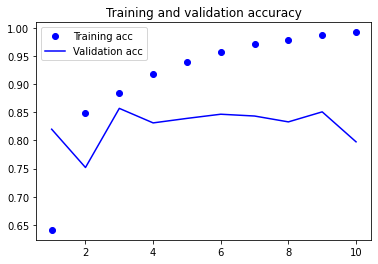

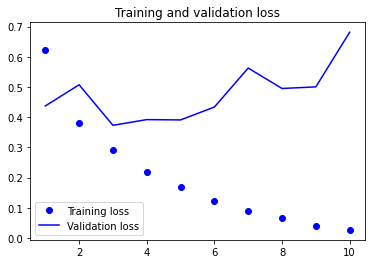

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

이전에 순환넽워크를 사용하지 않은 모델보다, val_acc가 낮은 것을 알 수 있다. 단어의 개수를 500개로 제한해서, 적은 정보를 활용했기 때문이다.  
더 성능이 좋은 고급 순환층을 살펴보자.

# 2) keras의 LSTM

In [23]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))  # Long Short-Term Memory 층 추가
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, ytrain,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 53s 329ms/step - loss: 0.6428 - acc: 0.6427 - val_loss: 0.4121 - val_acc: 0.8234
Epoch 2/10
157/157 [==============================] - 54s 346ms/step - loss: 0.3606 - acc: 0.8607 - val_loss: 0.3290 - val_acc: 0.8610
Epoch 3/10
157/157 [==============================] - 54s 345ms/step - loss: 0.2545 - acc: 0.9037 - val_loss: 0.3553 - val_acc: 0.8484
Epoch 4/10
157/157 [==============================] - 54s 344ms/step - loss: 0.2083 - acc: 0.9228 - val_loss: 0.3215 - val_acc: 0.8728
Epoch 5/10
157/157 [==============================] - 55s 348ms/step - loss: 0.1765 - acc: 0.9366 - val_loss: 0.3205 - val_acc: 0.8590
Epoch 6/10
157/157 [==============================] - 54s 345ms/step - loss: 0.1597 - acc: 0.9411 - val_loss: 0.3354 - val_acc: 0.8886
Epoch 7/10
157/157 [==============================] - 54s 347ms/step - loss: 0.1424 - acc: 0.9509 - val_loss: 0.3059 - val_acc: 0.8712
Epoch 8/10
157/157 [==============================] - 5

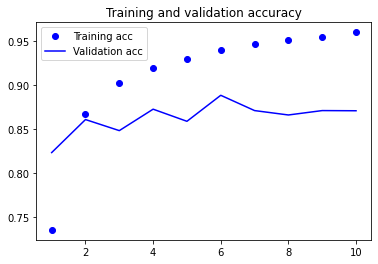

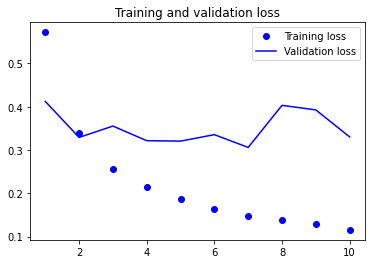

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

val_acc이 약 87%로, 조금 증가했다.

# 3) 기온 예측 예제

In [1]:
import zipfile
!unzip /content/sample_data/jena_climate_2009_2016.csv.zip

Archive:  /content/sample_data/jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [9]:
import os

#data_dir = './datasets/jena_climate/'
#fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open('/content/jena_climate_2009_2016.csv')
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',') # column 이름 추출
lines = lines[1:]

print(header) 
print(len(header))  # column의 개수
print(len(lines))  # 전체 데이터 개수

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
15
420551


In [11]:
# numpy 베열로 변환
import numpy as np

float_data = np.zeros((len(lines),len(header)-1))
print(float_data)
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i,:] = values

print(float_data[0,:])  # 0번째 column의 모든 행 추출

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
  3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
  1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]


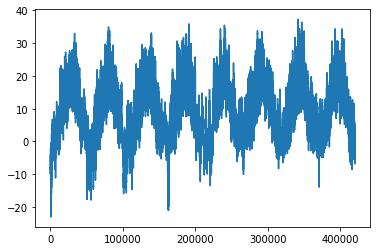

In [12]:
# 시간에 따른 기온 그래프
from matplotlib import pyplot as plt

temp = float_data[:, 1]  # 온도(섭씨)
plt.plot(range(len(temp)), temp)

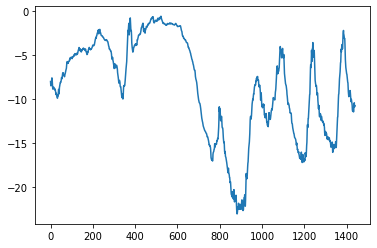

In [13]:
# 처음 10일간의 온도 데이터
# 10분마다 한개의 데이터가 생성되므로, 10일간은 1440개의 데이터가 존재한다.
plt.plot(range(1440), temp[:1440])

## 3-1) 데이터 전처리


In [14]:
# column마다 범위가 다르므로, 이를 정규화한다.
# 정규화를 위해 표준편차와 평균을 구한다.
# 처음 20만개 타입스텝을 훈련 데이터로 사용한다.
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [15]:
# samples는 입력 데이터로 사용할 배치
# targets는 samples에 대응하는 타깃 온도의 배열
# 한시간에 하나의 데이터를 추출하기 위해 step=6
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),  # 128(batch_size)
                           lookback // step,  #1440//6 = 240
                           data.shape[-1]))  #14
        targets = np.zeros((len(rows),)) # 128개의 영행렬
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]  # 독립변수
            targets[j] = data[rows[j] + delay][1]  # 종속변수
        yield samples, targets

In [16]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,  # 처음 20만개를 train data로 사용
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

## 3-2) 상식 수준의 기준점

현재 온도와 24시간 후의 온도가 동일하다고 예측하고, 그 둘의 절대오차의 평균을 구해보자.

In [20]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]  # 24시간 후의 온도 예측값
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


평균 절댓값 오차(MAE)는 약 0.29이다.  
딥러닝 모델이 더 나은 성능을 가지고 있는 지 확인해보자.

## 3-3) 기본적인 머신 러닝

In [22]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()

# 1440//6x14 개의 데이터를 flat하게 만듬
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))  #32개의 출력을 내는 노드
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 16s 31ms/step - loss: 1.7436 - val_loss: 0.6419
Epoch 2/20
500/500 [==============================] - 15s 30ms/step - loss: 0.5789 - val_loss: 0.3929
Epoch 3/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3403 - val_loss: 0.3353
Epoch 4/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2772 - val_loss: 0.3157
Epoch 5/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2597 - val_loss: 0.3078
Epoch 6/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2485 - val_loss: 0.3063
Epoch 7/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2393 - val_loss: 0.3177
Epoch 8/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2359 - val_loss: 0.3125
Epoch 9/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2256 - val_loss: 0.3150
Epoch 10/20
500/500 [==============================] - 15s 30ms/step - loss: 0.222

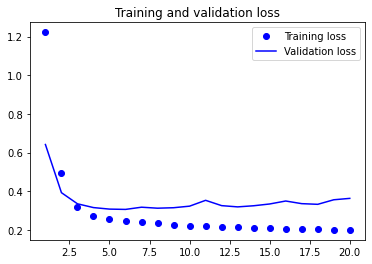

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

우리가 적용한 "상식" 에는 머신러닝 모델이 찾지 못한 핵심 정보가 많이 들어있으므로, 기준 모델의 성능이 더 좋은 것을 알 수 있다.

## 3-4) 첫 번째 순환 신경망

첫번째 완전 연결 네트워크는 시계열 데이터를 펼쳐서 사용했기 때문에, 입력 데이터에서 시간 정보가 손실됐다. 이 모델 대신, 순서가 의미가 있는 시퀀스 데이터 처리 모델을 사용해 보자.

In [24]:
# LSTM층 대신 GRU층 사용
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 83s 163ms/step - loss: 0.3565 - val_loss: 0.2692
Epoch 2/20
500/500 [==============================] - 81s 162ms/step - loss: 0.2849 - val_loss: 0.2636
Epoch 3/20
500/500 [==============================] - 81s 163ms/step - loss: 0.2808 - val_loss: 0.2639
Epoch 4/20
500/500 [==============================] - 83s 166ms/step - loss: 0.2748 - val_loss: 0.2605
Epoch 5/20
500/500 [==============================] - 82s 163ms/step - loss: 0.2690 - val_loss: 0.2642
Epoch 6/20
500/500 [==============================] - 82s 165ms/step - loss: 0.2635 - val_loss: 0.2649
Epoch 7/20
500/500 [==============================] - 84s 167ms/step - loss: 0.2569 - val_loss: 0.2611
Epoch 8/20
500/500 [==============================] - 85s 170ms/step - loss: 0.2539 - val_loss: 0.2660
Epoch 9/20
500/500 [==============================] - 83s 167ms/step - loss: 0.2492 - val_loss: 0.2651
Epoch 10/20
500/500 [==============================] - 83s 166ms/step - l

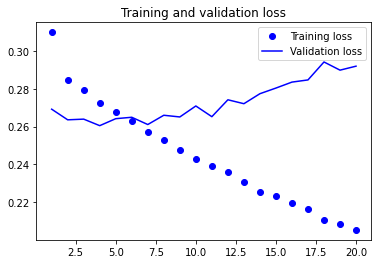

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

상식 수준의 모델보다 훨씬 좋은 성능을 보인다. 따라서 시퀀스를 펼쳐서 처리할 때에는 완전 연결 net에 비해 순환 net이 더 뛰어나다고 할 수 있다.

## 3-5 ) 과대적합 해소

### 3-5-1) Dropout 사용

In [26]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
500/500 [==============================] - 139s 274ms/step - loss: 0.3338 - val_loss: 0.2758
Epoch 2/40
500/500 [==============================] - 136s 272ms/step - loss: 0.3067 - val_loss: 0.2772
Epoch 3/40
500/500 [==============================] - 136s 272ms/step - loss: 0.3015 - val_loss: 0.2758
Epoch 4/40
500/500 [==============================] - 137s 273ms/step - loss: 0.2946 - val_loss: 0.2674
Epoch 5/40
500/500 [==============================] - 137s 274ms/step - loss: 0.2891 - val_loss: 0.2702
Epoch 6/40
500/500 [==============================] - 136s 273ms/step - loss: 0.2855 - val_loss: 0.2665
Epoch 7/40
500/500 [==============================] - 136s 272ms/step - loss: 0.2806 - val_loss: 0.2681
Epoch 8/40
500/500 [==============================] - 136s 272ms/step - loss: 0.2800 - val_loss: 0.2683
Epoch 9/40
500/500 [==============================] - 136s 273ms/step - loss: 0.2753 - val_loss: 0.2738
Epoch 10/40
500/500 [==============================] - 136s 271m

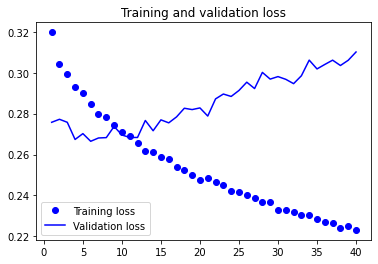

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


과대적합이 거의 일어나지 않았다. 성능에는 큰 차이가 없다. 이를 해결하기 위해 네트워크 용량을 늘려보자.

### 3-5-2) 스태킹 순환층

In [30]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,  # 마지막 타임스텝만 출력하는 것이 아니라 전체 시퀀스(3D 텐서)를 출력
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
500/500 [==============================] - 381s 753ms/step - loss: 0.3421 - val_loss: 0.2840
Epoch 2/10
500/500 [==============================] - 376s 752ms/step - loss: 0.3039 - val_loss: 0.2701
Epoch 3/10
500/500 [==============================] - 383s 766ms/step - loss: 0.2947 - val_loss: 0.2796
Epoch 4/10
500/500 [==============================] - 386s 771ms/step - loss: 0.2876 - val_loss: 0.2675
Epoch 5/10
500/500 [==============================] - 387s 774ms/step - loss: 0.2803 - val_loss: 0.2689
Epoch 6/10
500/500 [==============================] - 387s 775ms/step - loss: 0.2755 - val_loss: 0.2665
Epoch 7/10
500/500 [==============================] - 388s 776ms/step - loss: 0.2717 - val_loss: 0.2658
Epoch 8/10
500/500 [==============================] - 386s 773ms/step - loss: 0.2654 - val_loss: 0.2719
Epoch 9/10
500/500 [==============================] - 386s 773ms/step - loss: 0.2634 - val_loss: 0.2886
Epoch 10/10
500/500 [==============================] - 387s 774m

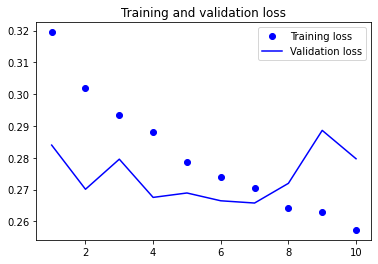

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

성능이 미미하게 향상됐다. 충분히 과대적합되도록 층의 크기를 늘릴 수도 있다. 하지만 이만큼 층을 추가했는데 성능의 큰 향상은 없는 걸로 보아, 더이상 네트워크의 용량을 늘리는 것은 도움이 안된다고 볼 수 있다.

### 3-5-3) 양방향 RNN 사용

In [32]:
# 최근 데이터가 먼저 나오도록 입력 시퀀스를 처리

def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets
        
train_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step, 
    batch_size=batch_size)
val_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)

In [33]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 84s 164ms/step - loss: 0.5002 - val_loss: 0.4778
Epoch 2/20
500/500 [==============================] - 83s 167ms/step - loss: 0.4501 - val_loss: 0.4660
Epoch 3/20
500/500 [==============================] - 82s 165ms/step - loss: 0.4117 - val_loss: 0.4639
Epoch 4/20
500/500 [==============================] - 82s 164ms/step - loss: 0.3694 - val_loss: 0.4450
Epoch 5/20
500/500 [==============================] - 82s 163ms/step - loss: 0.3440 - val_loss: 0.4450
Epoch 6/20
500/500 [==============================] - 84s 169ms/step - loss: 0.3239 - val_loss: 0.4443
Epoch 7/20
500/500 [==============================] - 83s 166ms/step - loss: 0.3117 - val_loss: 0.4394
Epoch 8/20
500/500 [==============================] - 84s 169ms/step - loss: 0.2970 - val_loss: 0.4357
Epoch 9/20
500/500 [==============================] - 82s 164ms/step - loss: 0.2833 - val_loss: 0.4281
Epoch 10/20
500/500 [==============================] - 82s 164ms/step - l

Text(0.5, 1.0, 'Training and validation loss')

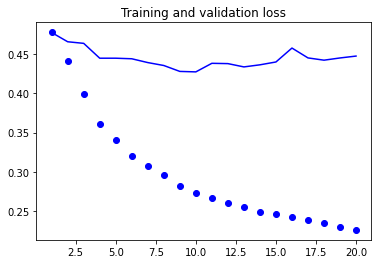

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

상식수준의 기준점보다 성능이 낮은 것을 확인할 수 있다. 과거보다 최근 내용을 더 잘 기억하기 때문에, 날씨 예측 예제에서는 시간 순서대로 처리하는 것이 매우 중요하다. 하지만 자연어 처리를 포함한 많은 문제에서는 시간이 크게 중요하지 않다. 문장 전체의 의미에, 단어가 어디에 위치해있느냐는 크게 영향을 주지 않기 때문이다.

In [35]:
#자연어 처리 예제에 적용 (LSTM 활용)

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 시퀀스를 뒤집는다
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# 시퀀스에 패딩을 추가
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/10
157/157 [==============================] - 70s 432ms/step - loss: 0.6112 - acc: 0.6519 - val_loss: 0.4145 - val_acc: 0.8452
Epoch 2/10
157/157 [==============================] - 73s 463ms/step - loss: 0.3426 - acc: 0.8691 - val_loss: 0.3215 - val_acc: 0.8792
Epoch 3/10
157/157 [==============================] - 70s 446ms/step - loss: 0.2508 - acc: 0.9085 - val_loss: 0.4502 - val_acc: 0.8256
Epoch 4/10
157/157 [==============================] - 69s 442ms/step - loss: 0.2027 - acc: 0.9282 - val_loss: 0.3386 - val_acc: 0.8800
Epoch 5/10
157/157 [==============================] - 71s 450ms/step - loss: 0.1877 - acc: 0.9340 - val_loss: 0.4211 - val_acc: 0.8698
Epoch 6/10
157/157 [==============================] - 71s 452ms/step - loss: 0.1581 - acc: 0.9453 - val_loss: 0.4025 - val_acc: 0.8634
Epoch 7/10
157/157 [==============================] - 72s 460ms/step - loss: 0.1524 - acc: 0.9495 - val_loss: 0.4615 - val_acc: 0.8590
Epoch 8/10
157/157 [==============================] - 7

시퀀스를 뒤집지 않고, 시간 순서로 훈련한 LSTM과 성능이 거의 동일하다.

## 3-6) keras의 Bidirectional 층을 사용한 양방향 RNN

### 3-6-1) IMDB 감성 분석 문제에 적용

In [36]:
from keras import backend as K
K.clear_session()

In [37]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 97s 591ms/step - loss: 0.6485 - acc: 0.6080 - val_loss: 0.4289 - val_acc: 0.8376
Epoch 2/10
157/157 [==============================] - 90s 573ms/step - loss: 0.4288 - acc: 0.8314 - val_loss: 0.4880 - val_acc: 0.7692
Epoch 3/10
157/157 [==============================] - 90s 574ms/step - loss: 0.3172 - acc: 0.8774 - val_loss: 0.4900 - val_acc: 0.8276
Epoch 4/10
157/157 [==============================] - 92s 585ms/step - loss: 0.2453 - acc: 0.9104 - val_loss: 0.3104 - val_acc: 0.8848
Epoch 5/10
157/157 [==============================] - 91s 581ms/step - loss: 0.2156 - acc: 0.9268 - val_loss: 0.3169 - val_acc: 0.8788
Epoch 6/10
157/157 [==============================] - 90s 576ms/step - loss: 0.1848 - acc: 0.9364 - val_loss: 0.3125 - val_acc: 0.8848
Epoch 7/10
157/157 [==============================] - 90s 576ms/step - loss: 0.1754 - acc: 0.9401 - val_loss: 0.5389 - val_acc: 0.8378
Epoch 8/10
157/157 [==============================] - 9

val_acc가 87% 정도로, 양방향을 적용하지 않은 LSTM보다 조금 성능이 향상됐다. 양방향인만큼, 단방향보다 모델 파라미터가 두 배 많기 때문에 과대적합이 일찍 시작된다.

### 3-6-2 ) 온도 예측 문제에 적용

In [38]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(
    layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
500/500 [==============================] - 149s 293ms/step - loss: 0.3190 - val_loss: 0.2734
Epoch 2/10
500/500 [==============================] - 146s 292ms/step - loss: 0.2778 - val_loss: 0.2686
Epoch 3/10
500/500 [==============================] - 145s 291ms/step - loss: 0.2701 - val_loss: 0.2646
Epoch 4/10
500/500 [==============================] - 145s 291ms/step - loss: 0.2635 - val_loss: 0.2641
Epoch 5/10
500/500 [==============================] - 144s 288ms/step - loss: 0.2578 - val_loss: 0.2662
Epoch 6/10
500/500 [==============================] - 146s 293ms/step - loss: 0.2541 - val_loss: 0.2651
Epoch 7/10
500/500 [==============================] - 144s 288ms/step - loss: 0.2498 - val_loss: 0.2709
Epoch 8/10
500/500 [==============================] - 145s 290ms/step - loss: 0.2418 - val_loss: 0.2718
Epoch 9/10
500/500 [==============================] - 146s 292ms/step - loss: 0.2377 - val_loss: 0.2818
Epoch 10/10
500/500 [==============================] - 145s 289m

3-4 에서 수행한 일반 GRU 층과 성능이 비슷하다.